#Unzip the data

In [1]:
# Extract data

!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

# Data Augmentation
It is a technique used to increase the images with some modification on original image. By doing this we can overcome overfitting.

In [2]:
# Import necessary lib.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Data augmentation on training variable

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
# Data augmentation on testing variable

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Data augmentation on training data

xtrain = train_datagen.flow_from_directory('/content/dataset/Training',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 1238 images belonging to 4 classes.


In [6]:
# Data augmentation on testing data

xtest = test_datagen.flow_from_directory('/content/dataset/Testing',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 326 images belonging to 4 classes.


# CNN model training

In [7]:
# Importing req. lib.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [8]:
# Build a CNN block

model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

In [9]:
# Compiling the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
len(xtrain)

13

In [10]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=25,
                    validation_data=xtest,
                    validation_steps=len(xtest))

<ipython-input-10-90e2dbdfbd42>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/25
13/13 [==============================] - 18s 611ms/step - loss: 2.2124 - accuracy: 0.2641 - val_loss: 1.2914 - val_accuracy: 0.3190
Epoch 2/25
13/13 [==============================] - 7s 506ms/step - loss: 1.2975 - accuracy: 0.3837 - val_loss: 1.2909 - val_accuracy: 0.3466
Epoch 3/25
13/13 [==============================] - 8s 580ms/step - loss: 1.1370 - accuracy: 0.5048 - val_loss: 0.9538 - val_accuracy: 0.6350
Epoch 4/25
13/13 [==============================] - 8s 584ms/step - loss: 0.9637 - accuracy: 0.6212 - val_loss: 0.8536 - val_accuracy: 0.6564
Epoch 5/25
13/13 [==============================] - 7s 513ms/step - loss: 0.8364 - accuracy: 0.6712 - val_loss: 0.6869 - val_accuracy: 0.7791
Epoch 6/25
13/13 [==============================] - 7s 582ms/step - loss: 0.7474 - accuracy: 0.7076 - val_loss: 0.6618 - val_accuracy: 0.7669
Epoch 7/25
13/13 [==============================] - 8s 611ms/step - loss: 0.7053 - accuracy: 0.7310 - val_loss: 0.5239 - val_accuracy: 0.7853
Epoch

In [11]:
# Save model

model.save('animal.h5')

# Testing model

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

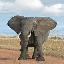

In [15]:
img = image.load_img('/content/download.jpg',target_size=(64,64)) # Reading image
img

In [16]:
x = image.img_to_array(img)
x

array([[[200., 215., 222.],
        [188., 202., 211.],
        [187., 205., 215.],
        ...,
        [179., 196., 212.],
        [179., 196., 212.],
        [179., 196., 212.]],

       [[217., 226., 231.],
        [201., 212., 216.],
        [198., 211., 219.],
        ...,
        [177., 194., 210.],
        [177., 194., 210.],
        [177., 194., 210.]],

       [[232., 236., 235.],
        [224., 230., 230.],
        [217., 225., 227.],
        ...,
        [171., 188., 204.],
        [176., 193., 209.],
        [177., 194., 210.]],

       ...,

       [[179., 134., 101.],
        [188., 143., 110.],
        [189., 144., 111.],
        ...,
        [190., 144., 111.],
        [191., 147., 118.],
        [198., 154., 125.]],

       [[203., 159., 130.],
        [190., 146., 117.],
        [207., 163., 134.],
        ...,
        [192., 146., 113.],
        [183., 139., 110.],
        [188., 144., 115.]],

       [[176., 146., 118.],
        [171., 140., 111.],
        [183., 1

In [17]:
img = np.expand_dims(x,axis=0)

In [18]:
img

array([[[[200., 215., 222.],
         [188., 202., 211.],
         [187., 205., 215.],
         ...,
         [179., 196., 212.],
         [179., 196., 212.],
         [179., 196., 212.]],

        [[217., 226., 231.],
         [201., 212., 216.],
         [198., 211., 219.],
         ...,
         [177., 194., 210.],
         [177., 194., 210.],
         [177., 194., 210.]],

        [[232., 236., 235.],
         [224., 230., 230.],
         [217., 225., 227.],
         ...,
         [171., 188., 204.],
         [176., 193., 209.],
         [177., 194., 210.]],

        ...,

        [[179., 134., 101.],
         [188., 143., 110.],
         [189., 144., 111.],
         ...,
         [190., 144., 111.],
         [191., 147., 118.],
         [198., 154., 125.]],

        [[203., 159., 130.],
         [190., 146., 117.],
         [207., 163., 134.],
         ...,
         [192., 146., 113.],
         [183., 139., 110.],
         [188., 144., 115.]],

        [[176., 146., 118.],
       

In [20]:
pred = model.predict(img)
pred

1/1 [==============================] - 0s 24ms/step


array([[0., 0., 1., 0.]], dtype=float32)

In [21]:
np.argmax(pred)

2

In [22]:
op = ['bears','crows','elephants','rats'] # Creating list
op[np.argmax(pred)] # List indexing with output

'elephants'